# Start Spark

In [1]:
import seaborn as sns

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
                        .master("local[8]")\
                        .config('spark.executor.memory', '5g')\
                        .config('spark.driver.memory', '5g')\
                        .config("spark.sql.session.timeZone", "UTC")\
                        .config("spark.sql.execution.arrow.enabled","true")\
                        .appName("Tweet wrangeling")\
                        .getOrCreate()

#                        .config('spark.local.dir','~/.spark_tmp/')\


In [3]:
spark

# Eth Tweets

In [21]:
parquet_eth_path = "../data/tweets/ethereum/parquet/sentiment/"

In [22]:
eth = spark.read.parquet(parquet_eth_path)

In [8]:
eth.printSchema()

root
 |-- username: string (nullable = true)
 |-- datetime: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- retweets: integer (nullable = true)
 |-- favorites: integer (nullable = true)
 |-- geo: string (nullable = true)
 |-- mentions: string (nullable = true)
 |-- hashtags: string (nullable = true)
 |-- id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- pos_vader: float (nullable = true)
 |-- neg_vader: float (nullable = true)
 |-- neu_vader: float (nullable = true)
 |-- compound_vader: float (nullable = true)
 |-- polarity_textblob: float (nullable = true)
 |-- subjectivity_textblob: float (nullable = true)



In [9]:
eth.count()

4326320

In [10]:
eth.select("text").distinct().count()

3514005

In [11]:
from pyspark.sql.functions import to_date

In [12]:
date_counts = eth.withColumn("date",to_date("datetime")).groupBy("date").count()

In [13]:
date_counts_pd = date_counts.toPandas()

In [14]:
import matplotlib

<IPython.core.display.Javascript object>


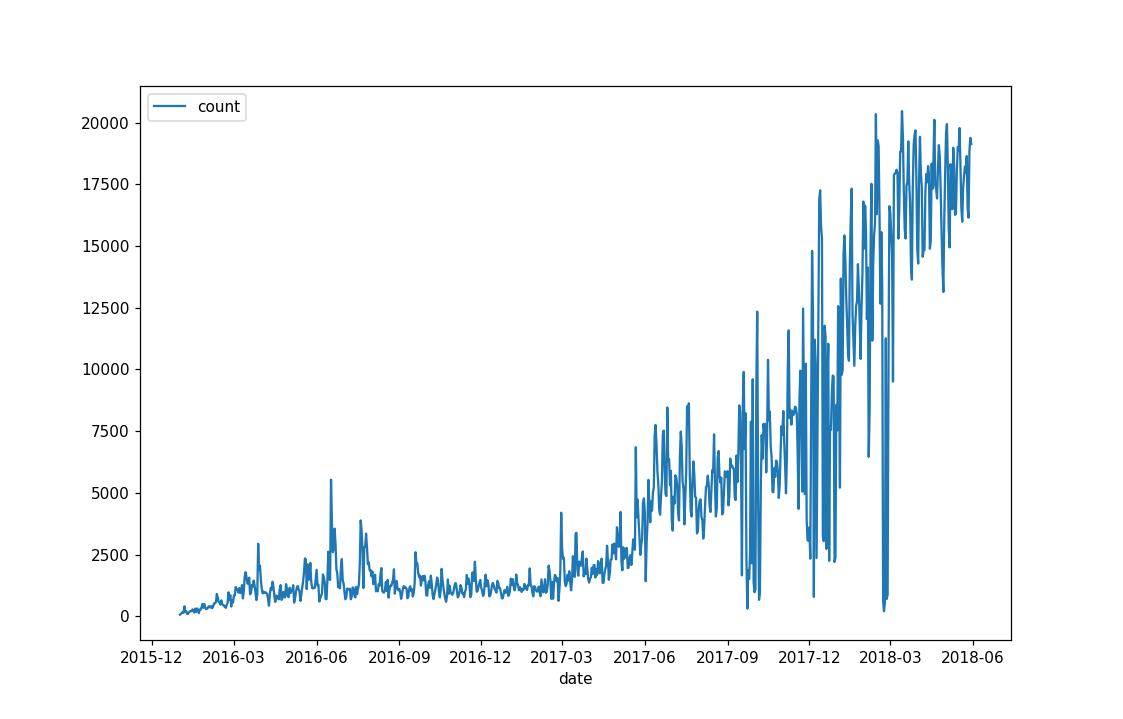

In [15]:
%matplotlib notebook
date_counts_pd.plot.line(x="date",y="count")

In [16]:
date_counts.filter("date > '2017-09' AND date < '2018-04' ").sort("count").show()

+----------+-----+
|      date|count|
+----------+-----+
|2018-02-22|  201|
|2017-09-23|  308|
|2018-02-23|  561|
|2018-02-21|  620|
|2017-10-06|  663|
|2018-02-25|  701|
|2017-12-06|  783|
|2018-02-26|  869|
|2017-10-01|  972|
|2017-10-07|  990|
|2017-10-02| 1096|
|2017-09-30| 1377|
|2017-09-25| 1507|
|2017-09-17| 1655|
|2017-09-24| 1853|
|2017-09-28| 2144|
|2017-12-29| 2197|
|2017-12-23| 2241|
|2017-12-02| 2331|
|2017-09-22| 2335|
+----------+-----+
only showing top 20 rows



In [14]:
date_counts.filter("date > '2017-09' AND date < '2018-04' ").filter("count < 2000").count()

15

## group by month

In [43]:
from pyspark.sql.functions import month, year, sum, to_date
month_year_counts_eth = eth.withColumn("date",to_date("datetime"))\
                            .groupBy(month('date').alias('month'),year('date').alias('year')).count()\
                            .sort('year','month')\
                            .toPandas()

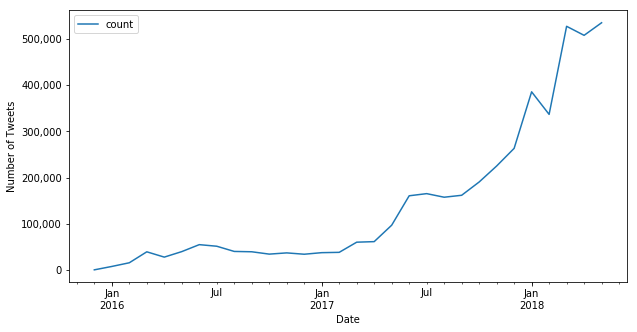

In [44]:
%matplotlib inline
import pandas as pd
num_records= len(month_year_counts_eth.year)
date_dic_eth = dict(year=month_year_counts_eth.year, month=month_year_counts_eth.month, day=[1]*num_records)

month_year_counts_eth['date'] = pd.to_datetime(date_dic_eth,format='%Y%m%d')
ax = month_year_counts_eth.drop(['month','year'],axis=1).set_index(["date"]).plot(kind='line',figsize=(10,5))
ax.set_xlabel("Date")
ax.set_ylabel("Number of Tweets")
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

# BTC Tweets

In [4]:
parquet_btc_path = "../data/tweets/bitcoin/parquet/sentiment/"

In [5]:
btc = spark.read.parquet(parquet_btc_path)

In [6]:
btc.printSchema()

root
 |-- username: string (nullable = true)
 |-- datetime: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- retweets: integer (nullable = true)
 |-- favorites: integer (nullable = true)
 |-- geo: string (nullable = true)
 |-- mentions: string (nullable = true)
 |-- hashtags: string (nullable = true)
 |-- id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- pos_vader: float (nullable = true)
 |-- neg_vader: float (nullable = true)
 |-- neu_vader: float (nullable = true)
 |-- compound_vader: float (nullable = true)
 |-- polarity_textblob: float (nullable = true)
 |-- subjectivity_textblob: float (nullable = true)



In [7]:
btc.count()

26208300

In [8]:
btc.distinct().count()

26208300

In [9]:
#btc.select("text").distinct().count()

In [23]:
17431338/20739466

0.8404911679018158

In [24]:
btc.distinct().count()

26208300

In [25]:
btc.limit(5).toPandas()

,username,datetime,text,retweets,favorites,geo,mentions,hashtags,id,permalink,pos_vader,neg_vader,neu_vader,compound_vader,polarity_textblob,subjectivity_textblob
0,RealJohnyRomero,2018-05-26 23:57:00,for the project that is used for bitcoin virtu...,0,1,None,None,None,1000526434698440712,https://twitter.com/RealJohnyRomero/status/100...,0.000,0.000,1.000,0.0000,0.000000,0.000000
1,de_erikita,2018-05-26 23:57:00,#ze_cash #ico https:// ze.cash Ze next Bitcoin...,0,0,None,None,#ze_cash #ico,1000526359175704578,https://twitter.com/de_erikita/status/10005263...,0.095,0.000,0.905,0.2960,0.000000,0.000000
2,theflyinghutch,2018-05-26 23:57:00,Joke: discussion describing the fallacies of b...,0,1,None,None,None,1000526279500877825,https://twitter.com/theflyinghutch/status/1000...,0.111,0.182,0.707,-0.3400,-0.200000,0.000000
3,beyazdiy,2018-05-26 23:54:00,"http:// bitcoinhaberleri.co Kripto para, kript...",0,0,None,None,None,1000525689802711042,https://twitter.com/beyazdiy/status/1000525689...,0.000,0.000,1.000,0.0000,0.000000,0.000000
4,AdegboyegaHeze4,2018-05-26 23:54:00,"Big airdrop Javatoken airdrop get 80,000 jtoke...",1,1,None,None,#TokenSa #ICO #bitcoin #ethereum #crypto #cryp...,1000525493911871488,https://twitter.com/AdegboyegaHeze4/status/100...,0.000,0.058,0.942,-0.2263,-0.035714,0.121429


In [26]:
from pyspark.sql.functions import to_date

In [27]:
date_counts_btc = btc.withColumn("date",to_date("datetime")).groupBy("date").count()

In [28]:
print("number of days that need to be reevaluated")
date_counts_btc.filter("count < 10000").sort("count").count()

number of days that need to be reevaluated


52

In [29]:
date_counts_btc.filter("count < 10000").sort("date").show(52)

+----------+-----+
|      date|count|
+----------+-----+
|2016-05-04| 1670|
|2016-07-03| 9516|
|2016-07-29| 9690|
|2016-07-31| 2357|
|2016-08-03| 1292|
|2016-08-07| 7095|
|2016-08-08| 8627|
|2016-08-13| 9854|
|2016-08-14| 1841|
|2016-08-16| 3681|
|2016-08-17| 2157|
|2016-08-18| 6904|
|2016-08-20| 4076|
|2016-09-13| 2662|
|2016-09-15|   13|
|2016-09-23| 1083|
|2016-09-24| 7887|
|2016-09-28| 9587|
|2016-09-29| 2307|
|2016-10-01|   16|
|2016-10-02| 2386|
|2016-10-03| 7661|
|2016-10-15| 2162|
|2016-10-16| 1831|
|2016-10-17| 1767|
|2016-10-18| 1351|
|2016-10-19|  461|
|2016-10-20|    8|
|2016-10-21| 2992|
|2016-10-22| 2209|
|2017-01-09|  854|
|2017-03-19| 3456|
|2017-03-20| 4730|
|2017-03-21|  533|
|2017-03-25| 4963|
|2017-03-26|   54|
|2017-04-20| 7158|
|2017-07-18| 7208|
|2017-10-06| 4145|
|2017-10-07| 3381|
|2017-10-29| 7549|
|2017-12-10| 7080|
|2018-02-25| 2577|
|2018-02-26| 4476|
|2018-03-04| 7394|
|2018-03-26| 2598|
|2018-04-19| 3130|
|2018-04-26| 7045|
|2018-05-09| 8469|
|2018-05-10|

In [30]:
date_counts_btc.filter("date == '2016-08-30'").show()

+----------+-----+
|      date|count|
+----------+-----+
|2016-08-30|17259|
+----------+-----+



In [31]:
date_counts_btc_pd = date_counts_btc.toPandas()

In [32]:
import matplotlib

<IPython.core.display.Javascript object>


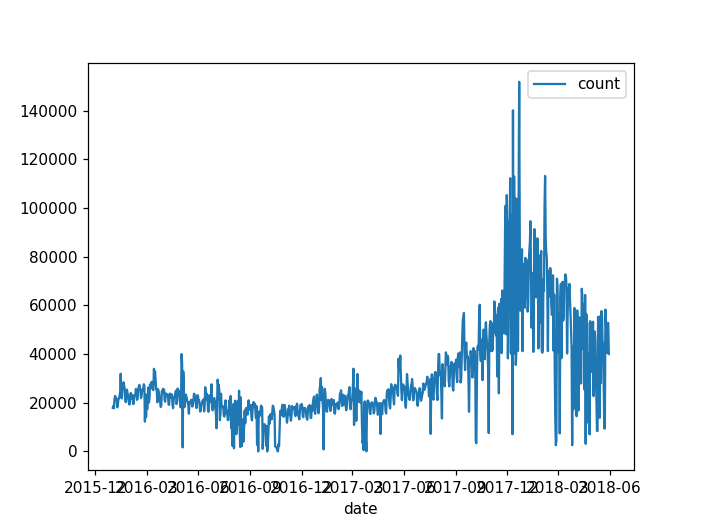

In [33]:
%matplotlib notebook
date_counts_btc_pd.plot.line(x="date",y="count")

## Group By Month

In [29]:
btc.printSchema()

root
 |-- username: string (nullable = true)
 |-- datetime: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- retweets: integer (nullable = true)
 |-- favorites: integer (nullable = true)
 |-- geo: string (nullable = true)
 |-- mentions: string (nullable = true)
 |-- hashtags: string (nullable = true)
 |-- id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- pos_vader: float (nullable = true)
 |-- neg_vader: float (nullable = true)
 |-- neu_vader: float (nullable = true)
 |-- compound_vader: float (nullable = true)
 |-- polarity_textblob: float (nullable = true)
 |-- subjectivity_textblob: float (nullable = true)



In [30]:
from pyspark.sql.functions import month, year, sum, to_date
month_year_counts = btc.withColumn("date",to_date("datetime"))\
                            .groupBy(month('date').alias('month'),year('date').alias('year')).count()\
                            .sort('year','month')\
                            .toPandas()

In [31]:
btc.count()

26208300

In [32]:
btc.withColumn("date",to_date("datetime"))\
                            .groupBy(month('date').alias('month'),year('date').alias('year')).count()\
                            .select(sum('count')).show()

+----------+
|sum(count)|
+----------+
|  26208300|
+----------+



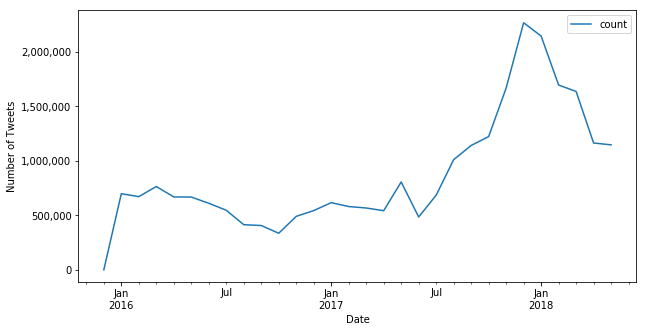

In [42]:
%matplotlib inline 
import pandas as pd
import matplotlib.ticker as tkr

num_records= len(month_year_counts.year)

date_dic = dict(year=month_year_counts.year, month=month_year_counts.month, day=[1]*num_records)

month_year_counts['date'] = pd.to_datetime(date_dic,format='%Y%m%d')
ax = month_year_counts.drop(['month','year'],axis=1).set_index(["date"]).plot(kind='line',figsize=(10,5))
ax.set_xlabel("Date")
ax.set_ylabel("Number of Tweets")
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

# Reddit

In [4]:
reddit = spark.read.parquet("../data/reddit-crypto/parquet/sentiment/")\

reddit = reddit.filter("created_utc >= '2016-01-01'")

In [5]:
reddit.select("subreddit").distinct().show()

+---------+
|subreddit|
+---------+
|ethtrader|
|      btc|
|  Bitcoin|
| ethereum|
+---------+



In [36]:
from pyspark.sql.functions import month, year, sum, to_date, col
month_year_counts = reddit.groupBy(month('created_utc').alias('month'),year('created_utc').alias('year'))\
                            .pivot("subreddit")\
                            .count()\
                            .sort('year','month')\
                            .withColumn("Ethereum Subreddits",col("ethtrader")+col("ethereum"))\
                            .withColumn("Bitcoin Subreddits",col("btc")+col("Bitcoin"))\
                            .drop("ethtrader","ethereum","btc","Bitcoin")\
                            .toPandas()

In [47]:
month_year_counts_v2 = month_year_counts.melt(id_vars=["date"], value_vars=["Ethereum Subreddits","Bitcoin Subreddits"], var_name="Crypto Currency")

In [48]:
month_year_counts_v2.head()

,date,Crypto Currency,value
0,2016-01-01,Ethereum Subreddits,11226
1,2016-02-01,Ethereum Subreddits,22046
2,2016-03-01,Ethereum Subreddits,37676
3,2016-04-01,Ethereum Subreddits,22734
4,2016-05-01,Ethereum Subreddits,29779


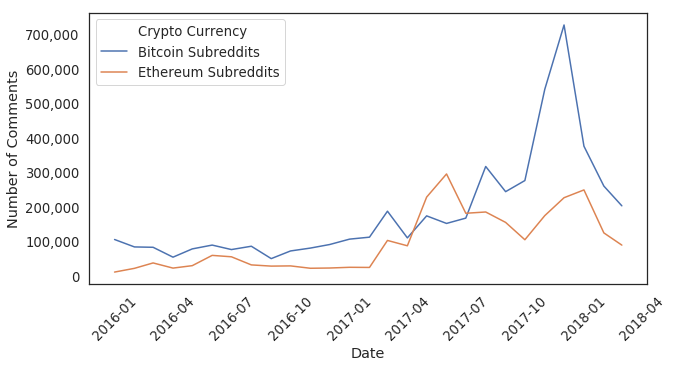

In [118]:
%matplotlib inline 
import pandas as pd
import matplotlib.ticker as tkr


num_records= len(month_year_counts.year)
date_dic = dict(year=month_year_counts.year, month=month_year_counts.month, day=[1]*num_records)
month_year_counts['date'] = pd.to_datetime(date_dic,format='%Y%m%d')

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(data=month_year_counts_v2.sort_values("Crypto Currency"),x="date",y="value",hue='Crypto Currency')

#ax = month_year_counts.drop(['month','year'],axis=1).set_index(["date"]).plot(kind='line',figsize=(10,5))


ax.set_xlabel("Date")
ax.set_ylabel("Number of Comments")

ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

sns.set(font_scale=1.2)
plt.xticks(rotation=45)
sns.set_style("white")

In [54]:
from pyspark.sql.functions import month, year, sum, to_date, col, when
month_year_counts_subreddits = reddit.groupBy(month('created_utc').alias('month'),year('created_utc').alias('year'),"subreddit")\
                            .count()\
                            .sort('year','month')\
                            .withColumn("Crypto Currency",
                                        when(
                                            (col("subreddit") == "ethtrader") | (col("subreddit") == "ethereum")
                                            ,"Ethereum").otherwise("Bitcoin"))\
                            .withColumnRenamed("subreddit","Subreddit")\
                            .toPandas()

In [57]:
import pandas as pd

num_records= len(month_year_counts_subreddits.year)
date_dic = dict(year=month_year_counts_subreddits.year, month=month_year_counts_subreddits.month, day=[1]*num_records)
month_year_counts_subreddits['date'] = pd.to_datetime(date_dic,format='%Y%m%d')

month_year_counts_subreddits.head()

,month,year,Subreddit,count,Crypto Currency,date
0,1,2016,btc,33111,Bitcoin,2016-01-01
1,1,2016,ethtrader,5262,Ethereum,2016-01-01
2,1,2016,ethereum,5964,Ethereum,2016-01-01
3,1,2016,Bitcoin,72453,Bitcoin,2016-01-01
4,2,2016,btc,33336,Bitcoin,2016-02-01


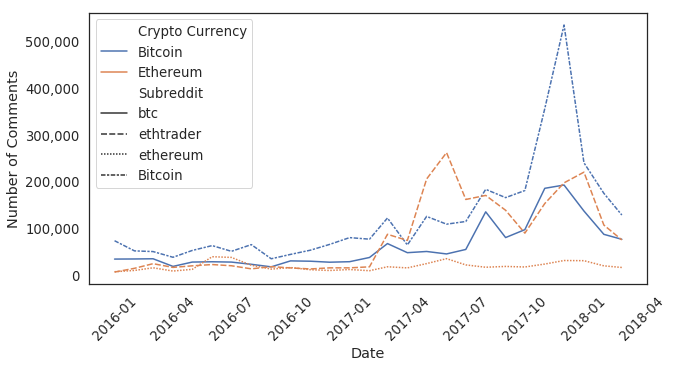

In [121]:
import seaborn as sns
import matplotlib.ticker as tkr
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(data=month_year_counts_subreddits,x="date",y="count",style="Subreddit",hue='Crypto Currency')
ax.set_xlabel("Date")
ax.set_ylabel("Number of Comments")
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

sns.set(font_scale=1.2)
plt.xticks(rotation=45)
sns.set_style("white")


## Eth - Reddit

In [21]:
ethr = spark.read.parquet("../data/reddit-crypto/parquet/sentiment/")\
            .filter("subreddit == 'ethtrader' OR subreddit == 'ethereum'")
ethr = ethr.filter("created_utc >= '2016-01-01'")

In [111]:
from pyspark.sql.functions import month, year, sum, to_date, col
month_year_counts = ethr.groupBy(month('created_utc').alias('month'),year('created_utc').alias('year'))\
                            .pivot("subreddit")\
                            .count()\
                            .sort('year','month')\
                            .toPandas()

In [112]:
month_year_counts.head()

,month,year,ethereum,ethtrader
0,1,2016,5929,5241
1,2,2016,8777,13311
2,3,2016,14405,23223
3,4,2016,7425,15262
4,5,2016,11176,18646


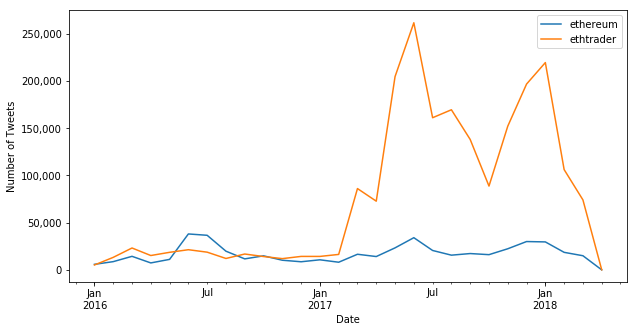

In [113]:
%matplotlib inline 
import pandas as pd
import matplotlib.ticker as tkr

num_records= len(month_year_counts.year)

date_dic = dict(year=month_year_counts.year, month=month_year_counts.month, day=[1]*num_records)

month_year_counts['date'] = pd.to_datetime(date_dic,format='%Y%m%d')
ax = month_year_counts.drop(['month','year'],axis=1).set_index(["date"]).plot(kind='line',figsize=(10,5))
ax.set_xlabel("Date")
ax.set_ylabel("Number of Tweets")
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

## BTC - Reddit

In [122]:
btcr = spark.read.parquet("../data/reddit-crypto/parquet/sentiment/")\
                .filter("subreddit == 'btc' OR subreddit == 'Bitcoin'")
btcr = btcr.filter("created_utc >= '2016-01-01'")

In [123]:
from pyspark.sql.functions import month, year, sum, to_date, col
month_year_counts = btcr.groupBy(month('created_utc').alias('month'),year('created_utc').alias('year'))\
                            .pivot("subreddit")\
                            .count()\
                            .sort('year','month')\
                            .toPandas()

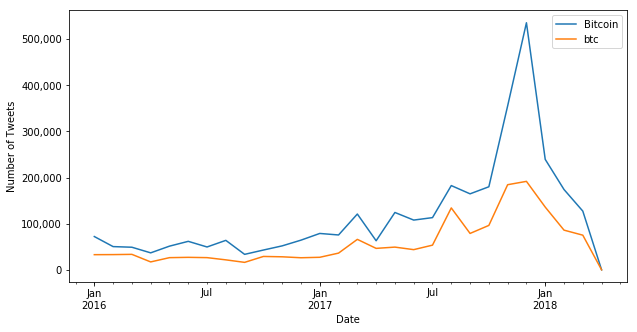

In [124]:
%matplotlib inline 
import pandas as pd
import matplotlib.ticker as tkr

num_records= len(month_year_counts.year)

date_dic = dict(year=month_year_counts.year, month=month_year_counts.month, day=[1]*num_records)

month_year_counts['date'] = pd.to_datetime(date_dic,format='%Y%m%d')
ax = month_year_counts.drop(['month','year'],axis=1).set_index(["date"]).plot(kind='line',figsize=(10,5))
ax.set_xlabel("Date")
ax.set_ylabel("Number of Tweets")
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))